<a href="https://colab.research.google.com/github/iman-ezatfar/PySpark_Countries_Temp_Analysis/blob/main/PySpark_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyspark

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType

In [3]:
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()

In [4]:
df = spark.read.csv("global_temperatures_by_country.csv", header = True, inferSchema=True)

In [5]:
df.show()

+----------+-------------------+-----------------------------+-------+
|        dt| AverageTemperature|AverageTemperatureUncertainty|Country|
+----------+-------------------+-----------------------------+-------+
|1912-01-01|              -7.12|                         0.31|   Asia|
|1913-12-01|-4.6530000000000005|                         0.34|   Asia|
|1900-01-01|-10.322000000000001|                         0.48|   Asia|
|1866-02-01|             -5.931|                         0.98|   Asia|
|1839-02-01|-4.3839999999999995|                         1.93|   Asia|
|1989-02-01|             -3.181|                        0.084|   Asia|
|2007-08-01| 21.023000000000003|                        0.092|   Asia|
|1953-11-01|             -0.932|                        0.106|   Asia|
|1952-10-01| 7.6709999999999985|                        0.119|   Asia|
|1976-08-01|             19.465|                        0.133|   Asia|
|1946-12-01|             -6.907|                        0.138|   Asia|
|1937-

In [6]:
df_clean = df.filter(df.AverageTemperature.isNotNull())
df.show()

+----------+-------------------+-----------------------------+-------+
|        dt| AverageTemperature|AverageTemperatureUncertainty|Country|
+----------+-------------------+-----------------------------+-------+
|1912-01-01|              -7.12|                         0.31|   Asia|
|1913-12-01|-4.6530000000000005|                         0.34|   Asia|
|1900-01-01|-10.322000000000001|                         0.48|   Asia|
|1866-02-01|             -5.931|                         0.98|   Asia|
|1839-02-01|-4.3839999999999995|                         1.93|   Asia|
|1989-02-01|             -3.181|                        0.084|   Asia|
|2007-08-01| 21.023000000000003|                        0.092|   Asia|
|1953-11-01|             -0.932|                        0.106|   Asia|
|1952-10-01| 7.6709999999999985|                        0.119|   Asia|
|1976-08-01|             19.465|                        0.133|   Asia|
|1946-12-01|             -6.907|                        0.138|   Asia|
|1937-

In [9]:
from pyspark.sql.functions import avg, col, substring

In [10]:
avg_temp_per_year = df_clean.groupby('Country').agg(avg('AverageTemperature'))
avg_temp_per_year.show()

+-------------+-----------------------+
|      Country|avg(AverageTemperature)|
+-------------+-----------------------+
|         Chad|     27.120466282420757|
|       Russia|     -5.521881912681911|
|     Anguilla|     26.610491850431444|
|     Paraguay|      23.23796755725191|
| Kingman Reef|      27.13303443877549|
|        Yemen|     26.253596725288023|
|Palmyra Atoll|      27.16345599489797|
|      Senegal|     27.967374999999997|
|       Sweden|     2.3863319646241337|
|     Kiribati|     26.736865347798354|
|       Guyana|     25.930920115495663|
|        Burma|     23.706197239536962|
|       Jersey|      10.92840871762478|
|      Eritrea|     26.802653110047856|
|  Philippines|      26.44047248677249|
|        Tonga|     23.236247852760755|
|     Djibouti|     28.816602533172468|
|     Malaysia|     25.805442007797247|
|    Singapore|       26.5231028265107|
|         Fiji|     25.038671779141108|
+-------------+-----------------------+
only showing top 20 rows



In [11]:
df_with_year = df.withColumn('Year', substring('dt',1,4))
df_with_year.show()

+----------+-------------------+-----------------------------+-------+----+
|        dt| AverageTemperature|AverageTemperatureUncertainty|Country|Year|
+----------+-------------------+-----------------------------+-------+----+
|1912-01-01|              -7.12|                         0.31|   Asia|1912|
|1913-12-01|-4.6530000000000005|                         0.34|   Asia|1913|
|1900-01-01|-10.322000000000001|                         0.48|   Asia|1900|
|1866-02-01|             -5.931|                         0.98|   Asia|1866|
|1839-02-01|-4.3839999999999995|                         1.93|   Asia|1839|
|1989-02-01|             -3.181|                        0.084|   Asia|1989|
|2007-08-01| 21.023000000000003|                        0.092|   Asia|2007|
|1953-11-01|             -0.932|                        0.106|   Asia|1953|
|1952-10-01| 7.6709999999999985|                        0.119|   Asia|1952|
|1976-08-01|             19.465|                        0.133|   Asia|1976|
|1946-12-01|

In [12]:
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for plotting
# Using df_with_year, as it contains both 'Year' and 'Country'
pdf = df_with_year.filter(df_with_year.Country == 'Iran').toPandas()

# The Year column is probably string type, convert it to integer for sorting and plotting
pdf['Year'] = pdf['Year'].astype(int)

# Sort by year for consistent plotting
pdf = pdf.sort_values(by='Year')

# Aggregate average temperature per year (if not already aggregated)
pdf = pdf.groupby('Year')['AverageTemperature'].mean().reset_index()

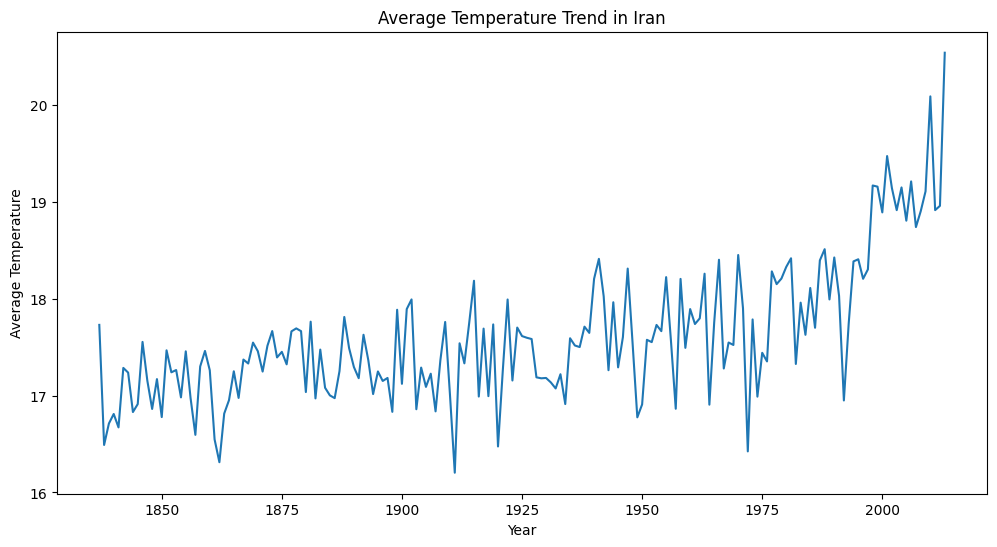

In [13]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pdf['Year'], pdf['AverageTemperature'])
plt.title('Average Temperature Trend in Iran')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()

In [14]:
from pyspark.sql.functions import avg

# Filter for temperatures above 25 degrees
high_temp_df = df_with_year.filter(df_with_year['AverageTemperature'] > 32)

# Calculate average temperature for each country
avg_temp_high_countries = high_temp_df.groupBy('Country').agg(avg('AverageTemperature').alias('AvgTemp'))

# Convert to Pandas DataFrame for plotting
pdf = avg_temp_high_countries.toPandas()

# Sort the DataFrame for better visualization
pdf = pdf.sort_values(by='AvgTemp', ascending=False)

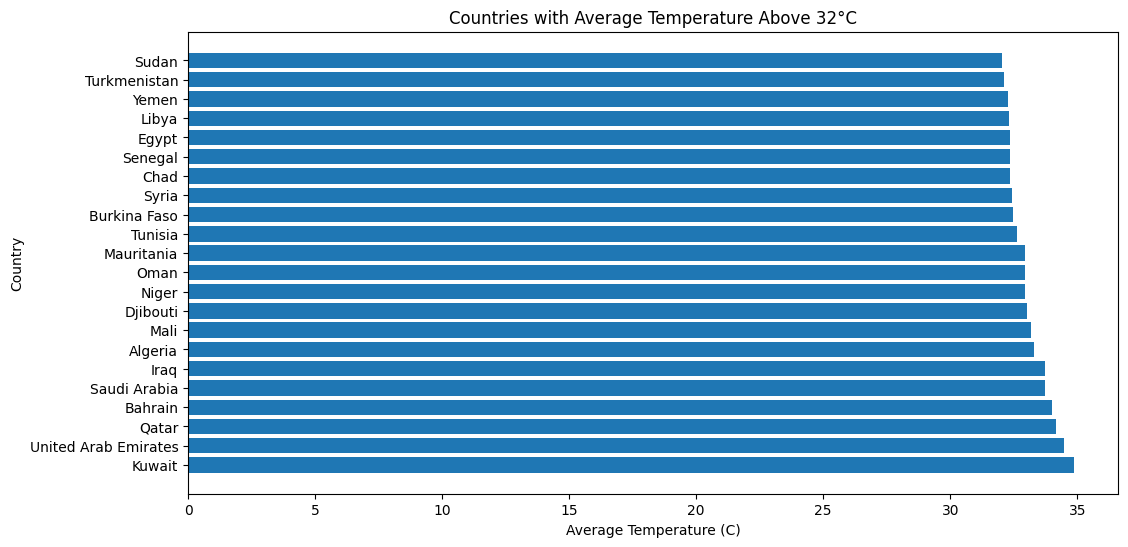

In [15]:
# Plotting
plt.figure(figsize=(12,6))
plt.barh(pdf['Country'], pdf['AvgTemp'])
plt.title('Countries with Average Temperature Above 32°C')
plt.xlabel('Average Temperature (C)')
plt.ylabel('Country')
plt.show()

In [22]:
import random

# Identify the last year in the dataset
last_year = df_with_year.agg({'Year': 'max'}).collect()[0][0]

# Filter the dataset for the last year
last_year_df = df_with_year.filter(df_with_year['Year'] == last_year)

# Calculate the average temperature for each country for the last year
avg_temp_last_year = last_year_df.groupBy('Country').agg(avg('AverageTemperature').alias('AvgTemp'))

# Convert to Pandas DataFrame for further processing
pdf = avg_temp_last_year.toPandas()

# Randomly select 15 countries
random_countries = random.sample(pdf['Country'].tolist(), 15)
pdf_filtered = pdf[pdf['Country'].isin(random_countries)]

# Sort the DataFrame for better visualization
pdf_filtered = pdf_filtered.sort_values(by='AvgTemp', ascending=True)

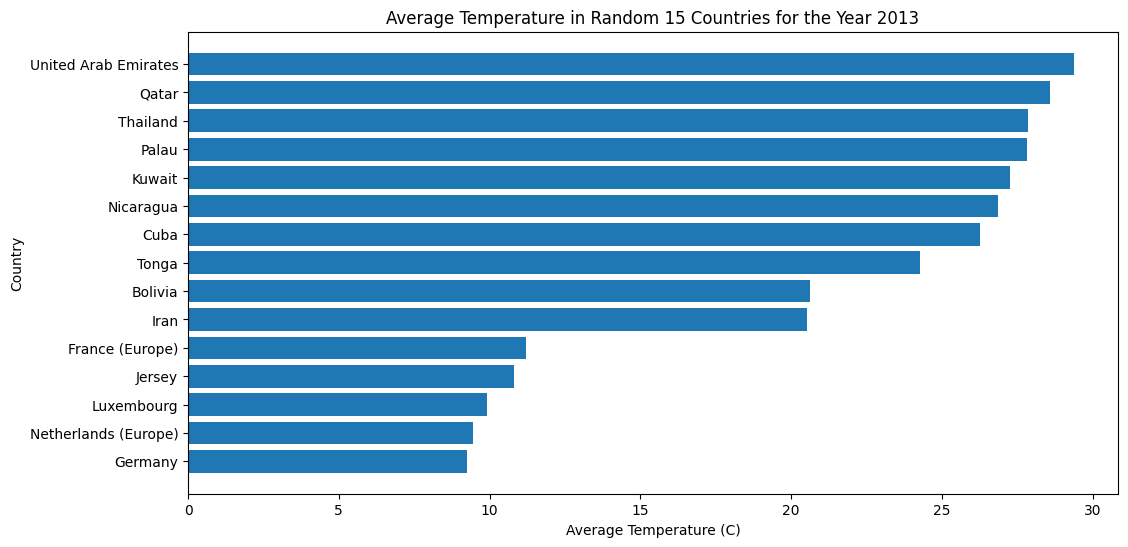

In [23]:
# Plotting
plt.figure(figsize=(12,6))
plt.barh(pdf_filtered['Country'], pdf_filtered['AvgTemp'])
plt.title(f'Average Temperature in Random 15 Countries for the Year {last_year}')
plt.xlabel('Average Temperature (C)')
plt.ylabel('Country')
plt.show()